# Clustering Insurance Leads with Survey Results

In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy

## Load and Explore the Dataset

In [7]:
df =pd.read_csv("Survey Results.csv")

In [8]:
df.head()

,Premium Savings very important,Agent Not Important
0,5,5
1,6,7
2,6,5
3,6,6
4,5,6


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
Premium Savings very important    150 non-null int64
Agent Not Important               150 non-null int64
dtypes: int64(2)
memory usage: 2.4 KB


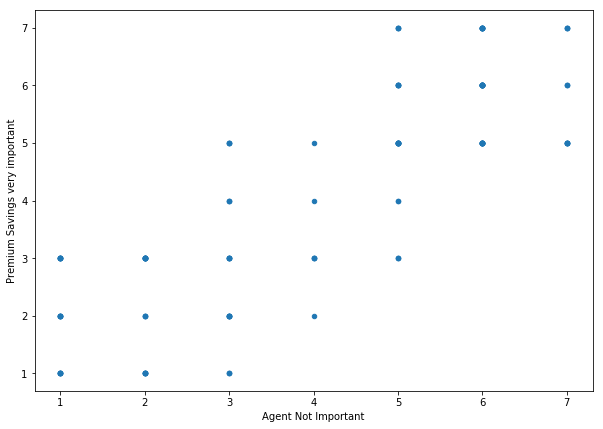

In [10]:
#Plot/Visualize the Data
df.plot(x='Agent Not Important', y='Premium Savings very important', kind='scatter', figsize=(10,7))

## Train a Clustering Model

## K-Means

### Elbow Method

In [22]:
#Set range for k
range_n_clusters= [2,3,4,5,6,7,8,9,10]

#Set an empty list to store the SSE values for each cluster
scores = []

# Iterate over cluster size options
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i, random_state=1) 
    kmeans.fit(df)
    score = kmeans.inertia_
    scores.append(score)
    print(str(i) +"\t" +str(score))

2	266.9726173541963
3	178.98094940010432
4	144.35327400571305
5	116.05806566658494
6	94.2636146559608
7	78.05805910040525
8	64.02894669829655
9	56.68969944370403
10	47.60354562877783


Text(0,0.5,'scores')

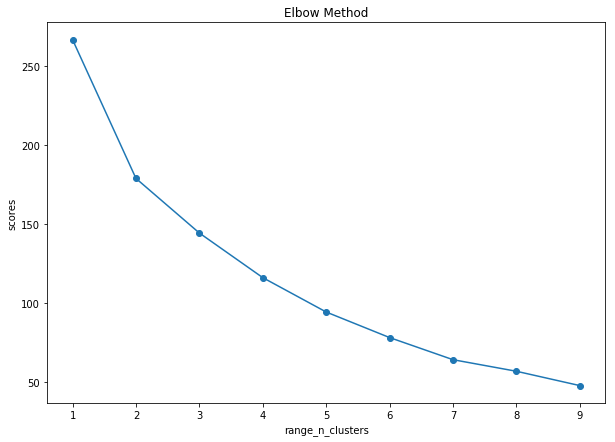

In [23]:
#Plot the results
plt.figure(figsize=(10,7))
plt.plot(range(1,10), scores, marker='o')
plt.title('Elbow Method')
plt.xlabel("range_n_clusters")
plt.ylabel("scores")

In [25]:
##Fitting kmeans to the dataset with k=3
km = KMeans(n_clusters=3,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km.fit_predict(df)

## Visualizing Results

In [26]:
## Add the labels to the original dataframe
df_new = df.copy()
df_new['Label'] = y_means

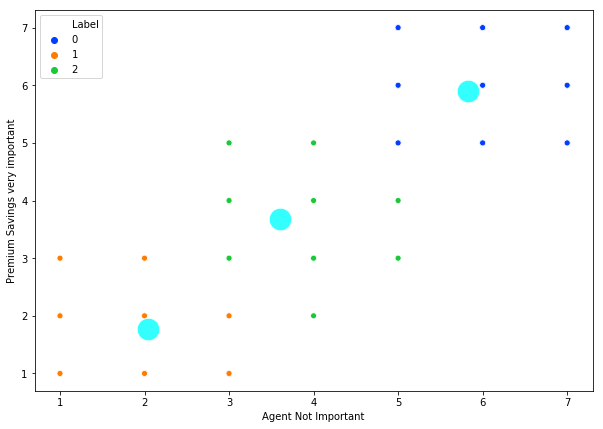

In [28]:
#Visualizing the clusters for k=5

#Set a color palette
bright_colors = sns.color_palette("bright", 3)

#Set figure size
fig, ax = plt.subplots(figsize=(10,7))

#Build the first plot 
sns.scatterplot(ax = ax, x=df_new['Agent Not Important'], y=df_new['Premium Savings very important'], hue=df_new.Label, 
                palette=bright_colors)

#Add on the cluster centers
centers = km.cluster_centers_
sns.scatterplot(centers[:,0], centers[:,1], s=500, alpha=0.8, color='cyan')

## Analyzing Clusters

In [70]:
#Check the size of each cluster
df_res.Label.value_counts()

0    71
1    54
2    25
Name: Label, dtype: int64

In [71]:
#Check the statistics on each cluster, this will help us "Profile" the clusters (Use a Pivot Table)
pd.pivot_table(df_res, index = ['Label'], values = ['Agent Not Important','Premium Savings very important'], 
               aggfunc=[np.mean,np.min, np.max])

mean                                               amin  \
      Agent Not Important Premium Savings very important Agent Not Important   
Label                                                                          
0                5.901408                       5.830986                   5   
1                1.777778                       2.037037                   1   
2                3.680000                       3.600000                   3   

                                                    amax  \
      Premium Savings very important Agent Not Important   
Label                                                      
0                                  5                   7   
1                                  1                   3   
2                                  2                   5   

                                      
      Premium Savings very important  
Label                                 
0                                  7  
1                                  3  
2                                  5

## Possible Use Cases/Applications for the Results

#### Label 0 consists of customers rating the importance of premium savings and availability of agents, as very high (71)
#### Label 1 consists of customers rating the importance of PS and availability of agents as very low (54)
#### Label 2 consists of customers rating the importance of PS and availability of agents as somewhat important (25)